# Regresi Linear Prediksi Berat Badan


In [2]:
import pandas as pd
import numpy as np
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [4]:
df = pd.read_excel("weight-height.xlsx")

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Gender,"Height","Weight"  10000 non-null  object
dtypes: object(1)
memory usage: 78.2+ KB


In [7]:
df.head()

,"Gender,""Height"",""Weight"""
0,"Male,73.847017017515,241.893563180437"
1,"Male,68.7819040458903,162.310472521300"
2,"Male,74.1101053917849,212.7408555565"
3,"Male,71.7309784033377,220.042470303077"
4,"Male,69.8817958611153,206.349800623871"


In [8]:
df.tail()

,"Gender,""Height"",""Weight"""
9995,"Female,66.1726521477708,136.777454183235"
9996,"Female,67.067154649054,170.867905890713"
9997,"Female,63.8679922137577,128.475318784122"
9998,"Female,69.0342431307346,163.852461346571"
9999,"Female,61.9442458795172,113.649102675312"


In [10]:
data = df.iloc[:, 0].str.split(',', expand=True)
data.columns = [n.replace('"', '') for n in df.columns.str.split(',')[0]]

In [11]:
data.head()

,Gender,Height,Weight
0,Male,73.847017017515,241.893563180437
1,Male,68.7819040458903,162.310472521300
2,Male,74.1101053917849,212.7408555565
3,Male,71.7309784033377,220.042470303077
4,Male,69.8817958611153,206.349800623871


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  10000 non-null  object
 1   Height  10000 non-null  object
 2   Weight  10000 non-null  object
dtypes: object(3)
memory usage: 234.5+ KB


In [13]:
df = data
print(df)

      Gender            Height            Weight
0       Male   73.847017017515  241.893563180437
1       Male  68.7819040458903  162.310472521300
2       Male  74.1101053917849    212.7408555565
3       Male  71.7309784033377  220.042470303077
4       Male  69.8817958611153  206.349800623871
...      ...               ...               ...
9995  Female  66.1726521477708  136.777454183235
9996  Female   67.067154649054  170.867905890713
9997  Female  63.8679922137577  128.475318784122
9998  Female  69.0342431307346  163.852461346571
9999  Female  61.9442458795172  113.649102675312

[10000 rows x 3 columns]


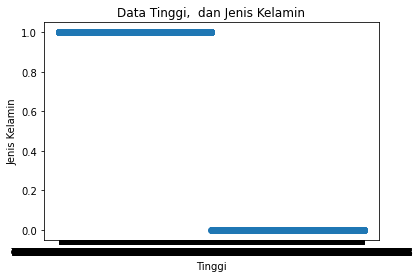

In [35]:
import matplotlib.pyplot as plt
plt.scatter(df['Height'],  df['Gender'])
plt.title('Data Tinggi,  dan Jenis Kelamin')
plt.xlabel('Tinggi')
plt.ylabel('Jenis Kelamin')
plt.show()

#Tahap Preprocessing Data

In [14]:
#Perubahan nilai ke binary
label_enc = LabelEncoder()
df.Gender = label_enc.fit_transform(df.Gender)

In [17]:
df.head()
print(df.head())
print(df)

   Gender            Height            Weight
0       1   73.847017017515  241.893563180437
1       1  68.7819040458903  162.310472521300
2       1  74.1101053917849    212.7408555565
3       1  71.7309784033377  220.042470303077
4       1  69.8817958611153  206.349800623871
      Gender            Height            Weight
0          1   73.847017017515  241.893563180437
1          1  68.7819040458903  162.310472521300
2          1  74.1101053917849    212.7408555565
3          1  71.7309784033377  220.042470303077
4          1  69.8817958611153  206.349800623871
...      ...               ...               ...
9995       0  66.1726521477708  136.777454183235
9996       0   67.067154649054  170.867905890713
9997       0  63.8679922137577  128.475318784122
9998       0  69.0342431307346  163.852461346571
9999       0  61.9442458795172  113.649102675312

[10000 rows x 3 columns]


In [18]:
X = df.drop("Weight", axis=1)
y = df["Weight"]

In [19]:
X

,Gender,Height
0,1,73.847017017515
1,1,68.7819040458903
2,1,74.1101053917849
3,1,71.7309784033377
4,1,69.8817958611153
...,...,...
9995,0,66.1726521477708
9996,0,67.067154649054
9997,0,63.8679922137577
9998,0,69.0342431307346


In [20]:
y

0       241.893563180437
1       162.310472521300
2         212.7408555565
3       220.042470303077
4       206.349800623871
              ...       
9995    136.777454183235
9996    170.867905890713
9997    128.475318784122
9998    163.852461346571
9999    113.649102675312
Name: Weight, Length: 10000, dtype: object

In [24]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  10000 non-null  int64 
 1   Height  10000 non-null  object
dtypes: int64(1), object(1)
memory usage: 156.4+ KB
None


# Tahap Training Pemodelan

In [25]:
ligres = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y)
model = ligres.fit(X_train, y_train)

In [48]:
from sklearn.metrics import r2_score
accuracy = model.score(X_test, y_test)
print("Besar model akurasi mencapai",accuracy*100,"%")


Besar model akurasi mencapai 90.21665856545013 %


# Menyimpan file dengan format.pkl

In [50]:
joblib.dump((model), "Linear_regression_Prediksi_Berat_Badan.pkl")

['Linear_regression_Prediksi_Berat_Badan.pkl']